In [2]:
pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.5/238.5 KB 26.8 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [65]:
import pandas as pd 
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler 

In [8]:
sp = spotipy.Spotify() 

cid ="2e01fb70abfd40ae8b2a5c6d26b14342" 

secret = "c83aaf8534e5452a9db69971fb83a666"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

sp.trace=False 

In [9]:
playlist = sp.user_playlist("geomcintire", "2GgjhzCFubrdr5NpCVl9DZ") 
playlist

{'collaborative': False,
 'description': '',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/2GgjhzCFubrdr5NpCVl9DZ'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/playlists/2GgjhzCFubrdr5NpCVl9DZ?additional_types=track',
 'id': '2GgjhzCFubrdr5NpCVl9DZ',
 'images': [{'height': 640,
   'url': 'https://mosaic.scdn.co/640/ab67616d0000b27333b8541201f1ef38941024beab67616d0000b273561bebcde13f57644b5550b2ab67616d0000b273c9eb4c87e1d7f5353908b712ab67616d0000b273ed1d7efd2fc937d8449fc7c7',
   'width': 640},
  {'height': 300,
   'url': 'https://mosaic.scdn.co/300/ab67616d0000b27333b8541201f1ef38941024beab67616d0000b273561bebcde13f57644b5550b2ab67616d0000b273c9eb4c87e1d7f5353908b712ab67616d0000b273ed1d7efd2fc937d8449fc7c7',
   'width': 300},
  {'height': 60,
   'url': 'https://mosaic.scdn.co/60/ab67616d0000b27333b8541201f1ef38941024beab67616d0000b273561bebcde13f57644b5550b2ab67616d0000b273c9eb4c87e1d7f5353908b712ab67616d0000b273ed1d7efd2fc937d8449f

In [10]:
songs = playlist["tracks"]["items"] 
songs

[{'added_at': '2023-02-08T10:13:44Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/315dzf3s76jo6fkyuyereqrklvfe'},
   'href': 'https://api.spotify.com/v1/users/315dzf3s76jo6fkyuyereqrklvfe',
   'id': '315dzf3s76jo6fkyuyereqrklvfe',
   'type': 'user',
   'uri': 'spotify:user:315dzf3s76jo6fkyuyereqrklvfe'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3WGpXCj9YhhfX11TToZcXP'},
      'href': 'https://api.spotify.com/v1/artists/3WGpXCj9YhhfX11TToZcXP',
      'id': '3WGpXCj9YhhfX11TToZcXP',
      'name': 'Troye Sivan',
      'type': 'artist',
      'uri': 'spotify:artist:3WGpXCj9YhhfX11TToZcXP'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
   

In [14]:
ids = [] 
for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"])

In [15]:
features = sp.audio_features(ids) 

In [26]:
playlist_l = sp.user_playlist("Liked", "2GgjhzCFubrdr5NpCVl9DZ") 
playlist_d = sp.user_playlist("Disliked", "1Hqi8LpVxqQc6rCHTMVMtY") 

In [20]:
liked_songs = playlist_l["tracks"]["items"] 

In [21]:
liked_ids = [] 
for i in range(len(liked_songs)): 
    liked_ids.append(liked_songs[i]["track"]["id"])

In [22]:
liked_features = sp.audio_features(liked_ids) 

In [23]:
liked_df = pd.DataFrame(liked_features)
liked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.578,0.5370,9,-8.676,1,0.0832,0.1620,0.000000,0.0760,0.250,83.909,audio_features,3afkJSKX0EAMsJXTZnDXXJ,spotify:track:3afkJSKX0EAMsJXTZnDXXJ,https://api.spotify.com/v1/tracks/3afkJSKX0EAM...,https://api.spotify.com/v1/audio-analysis/3afk...,201539,4
1,0.462,0.2400,0,-12.077,1,0.0377,0.9200,0.000000,0.1130,0.320,171.319,audio_features,0sY6ZUTh4yoctD8VIXz339,spotify:track:0sY6ZUTh4yoctD8VIXz339,https://api.spotify.com/v1/tracks/0sY6ZUTh4yoc...,https://api.spotify.com/v1/audio-analysis/0sY6...,244000,4
2,0.471,0.3350,4,-8.767,0,0.0273,0.5930,0.000021,0.2970,0.111,145.252,audio_features,0KmgJyW4GDgonqsoyx0CZ3,spotify:track:0KmgJyW4GDgonqsoyx0CZ3,https://api.spotify.com/v1/tracks/0KmgJyW4GDgo...,https://api.spotify.com/v1/audio-analysis/0Kmg...,243907,3
3,0.747,0.2650,1,-14.141,1,0.0354,0.7450,0.016900,0.1100,0.200,138.017,audio_features,5P6ZBMWS66FVo6deJaDdHy,spotify:track:5P6ZBMWS66FVo6deJaDdHy,https://api.spotify.com/v1/tracks/5P6ZBMWS66FV...,https://api.spotify.com/v1/audio-analysis/5P6Z...,229653,4
4,0.817,0.6340,5,-7.246,1,0.1620,0.3210,0.000000,0.0735,0.453,138.015,audio_features,0QpOqKz66ZxHNqj2PPHiFF,spotify:track:0QpOqKz66ZxHNqj2PPHiFF,https://api.spotify.com/v1/tracks/0QpOqKz66ZxH...,https://api.spotify.com/v1/audio-analysis/0QpO...,129241,4
5,0.697,0.5150,6,-6.335,1,0.0502,0.0576,0.000002,0.2940,0.370,95.086,audio_features,4BIuY0oEopXizyP3WvkNrT,spotify:track:4BIuY0oEopXizyP3WvkNrT,https://api.spotify.com/v1/tracks/4BIuY0oEopXi...,https://api.spotify.com/v1/audio-analysis/4BIu...,155385,4
6,0.518,0.4230,9,-8.818,1,0.0284,0.7900,0.000000,0.0765,0.323,129.905,audio_features,167NK7xPIRNKnSmUE9dBrQ,spotify:track:167NK7xPIRNKnSmUE9dBrQ,https://api.spotify.com/v1/tracks/167NK7xPIRNK...,https://api.spotify.com/v1/audio-analysis/167N...,168960,3
7,0.477,0.0489,4,-17.039,1,0.0611,0.9290,0.000000,0.0686,0.356,200.082,audio_features,1SiR9e7LVZWqk4qylz5eYA,spotify:track:1SiR9e7LVZWqk4qylz5eYA,https://api.spotify.com/v1/tracks/1SiR9e7LVZWq...,https://api.spotify.com/v1/audio-analysis/1SiR...,239700,3
8,0.681,0.2920,11,-9.599,1,0.0483,0.7430,0.000000,0.0974,0.162,64.002,audio_features,52iLDrSoRtf9lcgFuLVfqE,spotify:track:52iLDrSoRtf9lcgFuLVfqE,https://api.spotify.com/v1/tracks/52iLDrSoRtf9...,https://api.spotify.com/v1/audio-analysis/52iL...,191002,4
9,0.441,0.2020,7,-12.499,1,0.0381,0.7320,0.000026,0.1260,0.269,77.971,audio_features,1aEsTgCsv8nOjEgyEoRCpS,spotify:track:1aEsTgCsv8nOjEgyEoRCpS,https://api.spotify.com/v1/tracks/1aEsTgCsv8nO...,https://api.spotify.com/v1/audio-analysis/1aEs...,174587,4


In [24]:
target = []

for i in range(liked_df.shape[0]):
    target.append(1)

In [25]:
liked_df['target'] = target
liked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0.578,0.5370,9,-8.676,1,0.0832,0.1620,0.000000,0.0760,0.250,83.909,audio_features,3afkJSKX0EAMsJXTZnDXXJ,spotify:track:3afkJSKX0EAMsJXTZnDXXJ,https://api.spotify.com/v1/tracks/3afkJSKX0EAM...,https://api.spotify.com/v1/audio-analysis/3afk...,201539,4,1
1,0.462,0.2400,0,-12.077,1,0.0377,0.9200,0.000000,0.1130,0.320,171.319,audio_features,0sY6ZUTh4yoctD8VIXz339,spotify:track:0sY6ZUTh4yoctD8VIXz339,https://api.spotify.com/v1/tracks/0sY6ZUTh4yoc...,https://api.spotify.com/v1/audio-analysis/0sY6...,244000,4,1
2,0.471,0.3350,4,-8.767,0,0.0273,0.5930,0.000021,0.2970,0.111,145.252,audio_features,0KmgJyW4GDgonqsoyx0CZ3,spotify:track:0KmgJyW4GDgonqsoyx0CZ3,https://api.spotify.com/v1/tracks/0KmgJyW4GDgo...,https://api.spotify.com/v1/audio-analysis/0Kmg...,243907,3,1
3,0.747,0.2650,1,-14.141,1,0.0354,0.7450,0.016900,0.1100,0.200,138.017,audio_features,5P6ZBMWS66FVo6deJaDdHy,spotify:track:5P6ZBMWS66FVo6deJaDdHy,https://api.spotify.com/v1/tracks/5P6ZBMWS66FV...,https://api.spotify.com/v1/audio-analysis/5P6Z...,229653,4,1
4,0.817,0.6340,5,-7.246,1,0.1620,0.3210,0.000000,0.0735,0.453,138.015,audio_features,0QpOqKz66ZxHNqj2PPHiFF,spotify:track:0QpOqKz66ZxHNqj2PPHiFF,https://api.spotify.com/v1/tracks/0QpOqKz66ZxH...,https://api.spotify.com/v1/audio-analysis/0QpO...,129241,4,1
5,0.697,0.5150,6,-6.335,1,0.0502,0.0576,0.000002,0.2940,0.370,95.086,audio_features,4BIuY0oEopXizyP3WvkNrT,spotify:track:4BIuY0oEopXizyP3WvkNrT,https://api.spotify.com/v1/tracks/4BIuY0oEopXi...,https://api.spotify.com/v1/audio-analysis/4BIu...,155385,4,1
6,0.518,0.4230,9,-8.818,1,0.0284,0.7900,0.000000,0.0765,0.323,129.905,audio_features,167NK7xPIRNKnSmUE9dBrQ,spotify:track:167NK7xPIRNKnSmUE9dBrQ,https://api.spotify.com/v1/tracks/167NK7xPIRNK...,https://api.spotify.com/v1/audio-analysis/167N...,168960,3,1
7,0.477,0.0489,4,-17.039,1,0.0611,0.9290,0.000000,0.0686,0.356,200.082,audio_features,1SiR9e7LVZWqk4qylz5eYA,spotify:track:1SiR9e7LVZWqk4qylz5eYA,https://api.spotify.com/v1/tracks/1SiR9e7LVZWq...,https://api.spotify.com/v1/audio-analysis/1SiR...,239700,3,1
8,0.681,0.2920,11,-9.599,1,0.0483,0.7430,0.000000,0.0974,0.162,64.002,audio_features,52iLDrSoRtf9lcgFuLVfqE,spotify:track:52iLDrSoRtf9lcgFuLVfqE,https://api.spotify.com/v1/tracks/52iLDrSoRtf9...,https://api.spotify.com/v1/audio-analysis/52iL...,191002,4,1
9,0.441,0.2020,7,-12.499,1,0.0381,0.7320,0.000026,0.1260,0.269,77.971,audio_features,1aEsTgCsv8nOjEgyEoRCpS,spotify:track:1aEsTgCsv8nOjEgyEoRCpS,https://api.spotify.com/v1/tracks/1aEsTgCsv8nO...,https://api.spotify.com/v1/audio-analysis/1aEs...,174587,4,1


In [27]:
disliked_songs = playlist_d["tracks"]["items"] 

In [28]:
disliked_ids = []
for i in range(len(disliked_songs)): 
    disliked_ids.append(disliked_songs[i]["track"]["id"])
    
disliked_features = sp.audio_features(disliked_ids) 

In [29]:
disliked_df = pd.DataFrame(disliked_features)
disliked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.561,0.431,10,-8.810,1,0.0578,0.768000,0.000014,0.1060,0.137,143.875,audio_features,5wANPM4fQCJwkGd4rN57mH,spotify:track:5wANPM4fQCJwkGd4rN57mH,https://api.spotify.com/v1/tracks/5wANPM4fQCJw...,https://api.spotify.com/v1/audio-analysis/5wAN...,242013,4
1,0.736,0.704,3,-7.409,0,0.0615,0.020300,0.000000,0.0501,0.894,149.995,audio_features,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK,https://api.spotify.com/v1/tracks/27NovPIUIRrO...,https://api.spotify.com/v1/audio-analysis/27No...,212000,4
2,0.495,0.856,0,-5.123,0,0.0311,0.000219,0.000000,0.1030,0.609,158.024,audio_features,6IbnUaczZBT34DhaD6S18F,spotify:track:6IbnUaczZBT34DhaD6S18F,https://api.spotify.com/v1/tracks/6IbnUaczZBT3...,https://api.spotify.com/v1/audio-analysis/6Ibn...,154667,4
3,0.825,0.652,1,-3.183,0,0.0802,0.581000,0.000000,0.0931,0.931,95.977,audio_features,7qiZfU4dY1lWllzX7mPBI3,spotify:track:7qiZfU4dY1lWllzX7mPBI3,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,https://api.spotify.com/v1/audio-analysis/7qiZ...,233713,4
4,0.824,0.764,5,-4.175,0,0.0854,0.088800,0.002940,0.1170,0.881,107.998,audio_features,6Uj1ctrBOjOas8xZXGqKk4,spotify:track:6Uj1ctrBOjOas8xZXGqKk4,https://api.spotify.com/v1/tracks/6Uj1ctrBOjOa...,https://api.spotify.com/v1/audio-analysis/6Uj1...,172627,4
5,0.737,0.802,0,-4.771,1,0.0878,0.468000,0.000000,0.0931,0.682,144.015,audio_features,35mvY5S1H3J2QZyna3TFe0,spotify:track:35mvY5S1H3J2QZyna3TFe0,https://api.spotify.com/v1/tracks/35mvY5S1H3J2...,https://api.spotify.com/v1/audio-analysis/35mv...,172325,4
6,0.714,0.472,2,-7.375,1,0.0864,0.013000,0.000005,0.2660,0.238,131.121,audio_features,3nqQXoyQOWXiESFLlDF1hG,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://api.spotify.com/v1/tracks/3nqQXoyQOWXi...,https://api.spotify.com/v1/audio-analysis/3nqQ...,156943,4
7,0.743,0.778,8,-6.376,1,0.0534,0.213000,0.000006,0.4470,0.304,104.987,audio_features,3CIJfz69MiGtRfQdlaEk3U,spotify:track:3CIJfz69MiGtRfQdlaEk3U,https://api.spotify.com/v1/tracks/3CIJfz69MiGt...,https://api.spotify.com/v1/audio-analysis/3CIJ...,168008,4
8,0.786,0.408,0,-7.913,0,0.0688,0.136000,0.000000,0.1220,0.523,110.006,audio_features,6H6M3RdPVYAURu9oCimO2z,spotify:track:6H6M3RdPVYAURu9oCimO2z,https://api.spotify.com/v1/tracks/6H6M3RdPVYAU...,https://api.spotify.com/v1/audio-analysis/6H6M...,168267,4


In [30]:
liked_target = []

for i in range(disliked_df.shape[0]):
    liked_target.append(0)

In [31]:
disliked_df['target'] = liked_target
disliked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0.561,0.431,10,-8.810,1,0.0578,0.768000,0.000014,0.1060,0.137,143.875,audio_features,5wANPM4fQCJwkGd4rN57mH,spotify:track:5wANPM4fQCJwkGd4rN57mH,https://api.spotify.com/v1/tracks/5wANPM4fQCJw...,https://api.spotify.com/v1/audio-analysis/5wAN...,242013,4,0
1,0.736,0.704,3,-7.409,0,0.0615,0.020300,0.000000,0.0501,0.894,149.995,audio_features,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK,https://api.spotify.com/v1/tracks/27NovPIUIRrO...,https://api.spotify.com/v1/audio-analysis/27No...,212000,4,0
2,0.495,0.856,0,-5.123,0,0.0311,0.000219,0.000000,0.1030,0.609,158.024,audio_features,6IbnUaczZBT34DhaD6S18F,spotify:track:6IbnUaczZBT34DhaD6S18F,https://api.spotify.com/v1/tracks/6IbnUaczZBT3...,https://api.spotify.com/v1/audio-analysis/6Ibn...,154667,4,0
3,0.825,0.652,1,-3.183,0,0.0802,0.581000,0.000000,0.0931,0.931,95.977,audio_features,7qiZfU4dY1lWllzX7mPBI3,spotify:track:7qiZfU4dY1lWllzX7mPBI3,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,https://api.spotify.com/v1/audio-analysis/7qiZ...,233713,4,0
4,0.824,0.764,5,-4.175,0,0.0854,0.088800,0.002940,0.1170,0.881,107.998,audio_features,6Uj1ctrBOjOas8xZXGqKk4,spotify:track:6Uj1ctrBOjOas8xZXGqKk4,https://api.spotify.com/v1/tracks/6Uj1ctrBOjOa...,https://api.spotify.com/v1/audio-analysis/6Uj1...,172627,4,0
5,0.737,0.802,0,-4.771,1,0.0878,0.468000,0.000000,0.0931,0.682,144.015,audio_features,35mvY5S1H3J2QZyna3TFe0,spotify:track:35mvY5S1H3J2QZyna3TFe0,https://api.spotify.com/v1/tracks/35mvY5S1H3J2...,https://api.spotify.com/v1/audio-analysis/35mv...,172325,4,0
6,0.714,0.472,2,-7.375,1,0.0864,0.013000,0.000005,0.2660,0.238,131.121,audio_features,3nqQXoyQOWXiESFLlDF1hG,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://api.spotify.com/v1/tracks/3nqQXoyQOWXi...,https://api.spotify.com/v1/audio-analysis/3nqQ...,156943,4,0
7,0.743,0.778,8,-6.376,1,0.0534,0.213000,0.000006,0.4470,0.304,104.987,audio_features,3CIJfz69MiGtRfQdlaEk3U,spotify:track:3CIJfz69MiGtRfQdlaEk3U,https://api.spotify.com/v1/tracks/3CIJfz69MiGt...,https://api.spotify.com/v1/audio-analysis/3CIJ...,168008,4,0
8,0.786,0.408,0,-7.913,0,0.0688,0.136000,0.000000,0.1220,0.523,110.006,audio_features,6H6M3RdPVYAURu9oCimO2z,spotify:track:6H6M3RdPVYAURu9oCimO2z,https://api.spotify.com/v1/tracks/6H6M3RdPVYAU...,https://api.spotify.com/v1/audio-analysis/6H6M...,168267,4,0


In [32]:
#combining the two datasets

frames = [liked_df, disliked_df]
  
result = pd.concat(frames).reset_index()
result

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0,0.578,0.5370,9,-8.676,1,0.0832,0.162000,0.000000,0.0760,0.250,83.909,audio_features,3afkJSKX0EAMsJXTZnDXXJ,spotify:track:3afkJSKX0EAMsJXTZnDXXJ,https://api.spotify.com/v1/tracks/3afkJSKX0EAM...,https://api.spotify.com/v1/audio-analysis/3afk...,201539,4,1
1,1,0.462,0.2400,0,-12.077,1,0.0377,0.920000,0.000000,0.1130,0.320,171.319,audio_features,0sY6ZUTh4yoctD8VIXz339,spotify:track:0sY6ZUTh4yoctD8VIXz339,https://api.spotify.com/v1/tracks/0sY6ZUTh4yoc...,https://api.spotify.com/v1/audio-analysis/0sY6...,244000,4,1
2,2,0.471,0.3350,4,-8.767,0,0.0273,0.593000,0.000021,0.2970,0.111,145.252,audio_features,0KmgJyW4GDgonqsoyx0CZ3,spotify:track:0KmgJyW4GDgonqsoyx0CZ3,https://api.spotify.com/v1/tracks/0KmgJyW4GDgo...,https://api.spotify.com/v1/audio-analysis/0Kmg...,243907,3,1
3,3,0.747,0.2650,1,-14.141,1,0.0354,0.745000,0.016900,0.1100,0.200,138.017,audio_features,5P6ZBMWS66FVo6deJaDdHy,spotify:track:5P6ZBMWS66FVo6deJaDdHy,https://api.spotify.com/v1/tracks/5P6ZBMWS66FV...,https://api.spotify.com/v1/audio-analysis/5P6Z...,229653,4,1
4,4,0.817,0.6340,5,-7.246,1,0.1620,0.321000,0.000000,0.0735,0.453,138.015,audio_features,0QpOqKz66ZxHNqj2PPHiFF,spotify:track:0QpOqKz66ZxHNqj2PPHiFF,https://api.spotify.com/v1/tracks/0QpOqKz66ZxH...,https://api.spotify.com/v1/audio-analysis/0QpO...,129241,4,1
5,5,0.697,0.5150,6,-6.335,1,0.0502,0.057600,0.000002,0.2940,0.370,95.086,audio_features,4BIuY0oEopXizyP3WvkNrT,spotify:track:4BIuY0oEopXizyP3WvkNrT,https://api.spotify.com/v1/tracks/4BIuY0oEopXi...,https://api.spotify.com/v1/audio-analysis/4BIu...,155385,4,1
6,6,0.518,0.4230,9,-8.818,1,0.0284,0.790000,0.000000,0.0765,0.323,129.905,audio_features,167NK7xPIRNKnSmUE9dBrQ,spotify:track:167NK7xPIRNKnSmUE9dBrQ,https://api.spotify.com/v1/tracks/167NK7xPIRNK...,https://api.spotify.com/v1/audio-analysis/167N...,168960,3,1
7,7,0.477,0.0489,4,-17.039,1,0.0611,0.929000,0.000000,0.0686,0.356,200.082,audio_features,1SiR9e7LVZWqk4qylz5eYA,spotify:track:1SiR9e7LVZWqk4qylz5eYA,https://api.spotify.com/v1/tracks/1SiR9e7LVZWq...,https://api.spotify.com/v1/audio-analysis/1SiR...,239700,3,1
8,8,0.681,0.2920,11,-9.599,1,0.0483,0.743000,0.000000,0.0974,0.162,64.002,audio_features,52iLDrSoRtf9lcgFuLVfqE,spotify:track:52iLDrSoRtf9lcgFuLVfqE,https://api.spotify.com/v1/tracks/52iLDrSoRtf9...,https://api.spotify.com/v1/audio-analysis/52iL...,191002,4,1
9,9,0.441,0.2020,7,-12.499,1,0.0381,0.732000,0.000026,0.1260,0.269,77.971,audio_features,1aEsTgCsv8nOjEgyEoRCpS,spotify:track:1aEsTgCsv8nOjEgyEoRCpS,https://api.spotify.com/v1/tracks/1aEsTgCsv8nO...,https://api.spotify.com/v1/audio-analysis/1aEs...,174587,4,1


In [33]:
#shuffling the data

result = result.sample(frac = 1).reset_index()
result

,level_0,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,15,15,0.656,0.2910,2,-10.572,1,0.0293,0.872000,0.000000,...,0.298,103.971,audio_features,4RCWB3V8V0dignt99LZ8vH,spotify:track:4RCWB3V8V0dignt99LZ8vH,https://api.spotify.com/v1/tracks/4RCWB3V8V0di...,https://api.spotify.com/v1/audio-analysis/4RCW...,232533,4,1
1,3,3,0.747,0.2650,1,-14.141,1,0.0354,0.745000,0.016900,...,0.200,138.017,audio_features,5P6ZBMWS66FVo6deJaDdHy,spotify:track:5P6ZBMWS66FVo6deJaDdHy,https://api.spotify.com/v1/tracks/5P6ZBMWS66FV...,https://api.spotify.com/v1/audio-analysis/5P6Z...,229653,4,1
2,2,2,0.471,0.3350,4,-8.767,0,0.0273,0.593000,0.000021,...,0.111,145.252,audio_features,0KmgJyW4GDgonqsoyx0CZ3,spotify:track:0KmgJyW4GDgonqsoyx0CZ3,https://api.spotify.com/v1/tracks/0KmgJyW4GDgo...,https://api.spotify.com/v1/audio-analysis/0Kmg...,243907,3,1
3,23,4,0.824,0.7640,5,-4.175,0,0.0854,0.088800,0.002940,...,0.881,107.998,audio_features,6Uj1ctrBOjOas8xZXGqKk4,spotify:track:6Uj1ctrBOjOas8xZXGqKk4,https://api.spotify.com/v1/tracks/6Uj1ctrBOjOa...,https://api.spotify.com/v1/audio-analysis/6Uj1...,172627,4,0
4,0,0,0.578,0.5370,9,-8.676,1,0.0832,0.162000,0.000000,...,0.250,83.909,audio_features,3afkJSKX0EAMsJXTZnDXXJ,spotify:track:3afkJSKX0EAMsJXTZnDXXJ,https://api.spotify.com/v1/tracks/3afkJSKX0EAM...,https://api.spotify.com/v1/audio-analysis/3afk...,201539,4,1
5,18,18,0.406,0.4080,3,-9.419,1,0.0530,0.771000,0.000008,...,0.525,79.705,audio_features,2MOoIbJWIYikwIXjBDe26i,spotify:track:2MOoIbJWIYikwIXjBDe26i,https://api.spotify.com/v1/tracks/2MOoIbJWIYik...,https://api.spotify.com/v1/audio-analysis/2MOo...,204712,4,1
6,19,0,0.561,0.4310,10,-8.810,1,0.0578,0.768000,0.000014,...,0.137,143.875,audio_features,5wANPM4fQCJwkGd4rN57mH,spotify:track:5wANPM4fQCJwkGd4rN57mH,https://api.spotify.com/v1/tracks/5wANPM4fQCJw...,https://api.spotify.com/v1/audio-analysis/5wAN...,242013,4,0
7,5,5,0.697,0.5150,6,-6.335,1,0.0502,0.057600,0.000002,...,0.370,95.086,audio_features,4BIuY0oEopXizyP3WvkNrT,spotify:track:4BIuY0oEopXizyP3WvkNrT,https://api.spotify.com/v1/tracks/4BIuY0oEopXi...,https://api.spotify.com/v1/audio-analysis/4BIu...,155385,4,1
8,8,8,0.681,0.2920,11,-9.599,1,0.0483,0.743000,0.000000,...,0.162,64.002,audio_features,52iLDrSoRtf9lcgFuLVfqE,spotify:track:52iLDrSoRtf9lcgFuLVfqE,https://api.spotify.com/v1/tracks/52iLDrSoRtf9...,https://api.spotify.com/v1/audio-analysis/52iL...,191002,4,1
9,9,9,0.441,0.2020,7,-12.499,1,0.0381,0.732000,0.000026,...,0.269,77.971,audio_features,1aEsTgCsv8nOjEgyEoRCpS,spotify:track:1aEsTgCsv8nOjEgyEoRCpS,https://api.spotify.com/v1/tracks/1aEsTgCsv8nO...,https://api.spotify.com/v1/audio-analysis/1aEs...,174587,4,1


In [34]:
X = result.drop(["target", "level_0", "index", "type", "id", "uri", "track_href", "analysis_url"], axis=1)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.656,0.2910,2,-10.572,1,0.0293,0.872000,0.000000,0.1140,0.298,103.971,232533,4
1,0.747,0.2650,1,-14.141,1,0.0354,0.745000,0.016900,0.1100,0.200,138.017,229653,4
2,0.471,0.3350,4,-8.767,0,0.0273,0.593000,0.000021,0.2970,0.111,145.252,243907,3
3,0.824,0.7640,5,-4.175,0,0.0854,0.088800,0.002940,0.1170,0.881,107.998,172627,4
4,0.578,0.5370,9,-8.676,1,0.0832,0.162000,0.000000,0.0760,0.250,83.909,201539,4
5,0.406,0.4080,3,-9.419,1,0.0530,0.771000,0.000008,0.3940,0.525,79.705,204712,4
6,0.561,0.4310,10,-8.810,1,0.0578,0.768000,0.000014,0.1060,0.137,143.875,242013,4
7,0.697,0.5150,6,-6.335,1,0.0502,0.057600,0.000002,0.2940,0.370,95.086,155385,4
8,0.681,0.2920,11,-9.599,1,0.0483,0.743000,0.000000,0.0974,0.162,64.002,191002,4
9,0.441,0.2020,7,-12.499,1,0.0381,0.732000,0.000026,0.1260,0.269,77.971,174587,4


In [35]:
y = result["target"]
y

0     1
1     1
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    0
16    0
17    1
18    0
19    1
20    0
21    0
22    1
23    0
24    1
25    1
26    1
27    0
Name: target, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

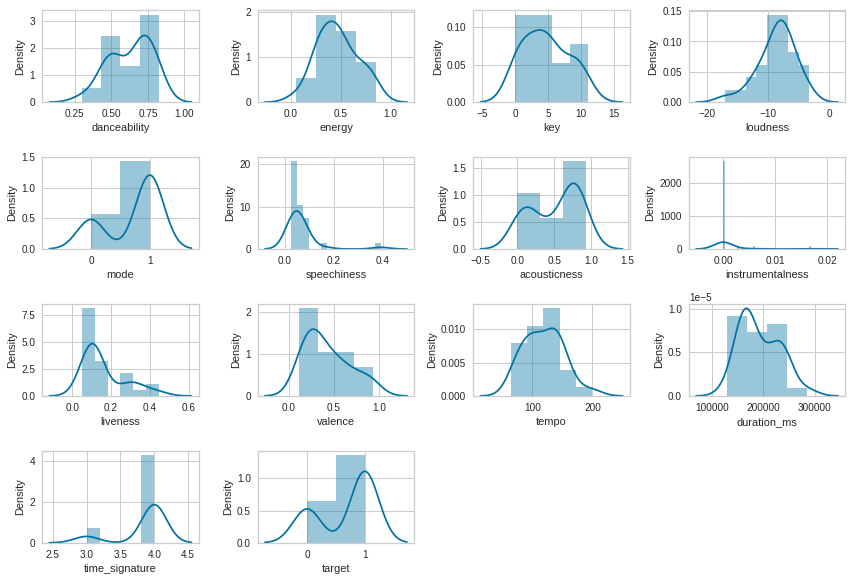

In [36]:
import seaborn as sns

numerical_features = result.select_dtypes(exclude=['object']).drop(['level_0', 'index'], axis=1).copy()

fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(numerical_features.iloc[:,i].dropna())
    plt.xlabel(numerical_features.columns[i])
plt.tight_layout()
plt.show()

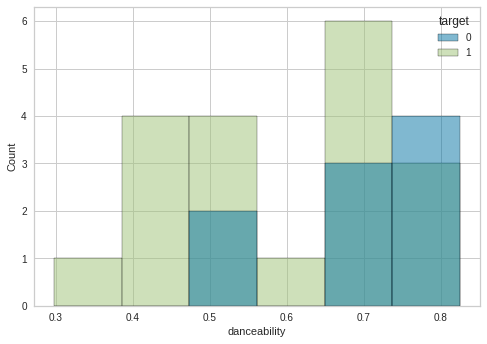

In [37]:
sns.histplot(data=result, x="danceability", hue="target")

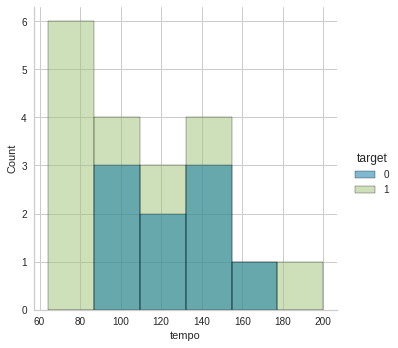

In [38]:
sns.displot(data=numerical_features, x="tempo", hue="target")

In [39]:
numerical_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
0,0.656,0.2910,2,-10.572,1,0.0293,0.872000,0.000000,0.1140,0.298,103.971,232533,4,1
1,0.747,0.2650,1,-14.141,1,0.0354,0.745000,0.016900,0.1100,0.200,138.017,229653,4,1
2,0.471,0.3350,4,-8.767,0,0.0273,0.593000,0.000021,0.2970,0.111,145.252,243907,3,1
3,0.824,0.7640,5,-4.175,0,0.0854,0.088800,0.002940,0.1170,0.881,107.998,172627,4,0
4,0.578,0.5370,9,-8.676,1,0.0832,0.162000,0.000000,0.0760,0.250,83.909,201539,4,1
5,0.406,0.4080,3,-9.419,1,0.0530,0.771000,0.000008,0.3940,0.525,79.705,204712,4,1
6,0.561,0.4310,10,-8.810,1,0.0578,0.768000,0.000014,0.1060,0.137,143.875,242013,4,0
7,0.697,0.5150,6,-6.335,1,0.0502,0.057600,0.000002,0.2940,0.370,95.086,155385,4,1
8,0.681,0.2920,11,-9.599,1,0.0483,0.743000,0.000000,0.0974,0.162,64.002,191002,4,1
9,0.441,0.2020,7,-12.499,1,0.0381,0.732000,0.000026,0.1260,0.269,77.971,174587,4,1


In [50]:
track_uri_s = []
for track in sp.playlist_tracks('2GgjhzCFubrdr5NpCVl9DZ')["items"]:
    #URI
    track_uri = track["track"]["uri"]
    track_uri_s.append(track_uri)
    
    #Track name
    track_name = track["track"]["name"]
    
    #Main Artist
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)
    
    #Name, popularity, genre
    artist_name = track["track"]["artists"][0]["name"]
    artist_pop = artist_info["popularity"]
    artist_genres = artist_info["genres"]
    
    #Album
    album = track["track"]["album"]["name"]
    
    #Popularity of the track
    track_pop = track["track"]["popularity"]
     

In [51]:
#audio features of first track in playlist
sp.audio_features(track_uri_s)[0]

{'danceability': 0.578,
 'energy': 0.537,
 'key': 9,
 'loudness': -8.676,
 'mode': 1,
 'speechiness': 0.0832,
 'acousticness': 0.162,
 'instrumentalness': 0,
 'liveness': 0.076,
 'valence': 0.25,
 'tempo': 83.909,
 'type': 'audio_features',
 'id': '3afkJSKX0EAMsJXTZnDXXJ',
 'uri': 'spotify:track:3afkJSKX0EAMsJXTZnDXXJ',
 'track_href': 'https://api.spotify.com/v1/tracks/3afkJSKX0EAMsJXTZnDXXJ',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3afkJSKX0EAMsJXTZnDXXJ',
 'duration_ms': 201539,
 'time_signature': 4}

In [52]:
#features for all songs in playlist
audio_features = []
for i in range(len('2GgjhzCFubrdr5NpCVl9DZ')):
    audio_features.append(sp.audio_features('2GgjhzCFubrdr5NpCVl9DZ'[i]))
audio_features[0]

#track names
track_names = []
for k in sp.playlist_tracks('2GgjhzCFubrdr5NpCVl9DZ')["items"]:
    track_names.append(k["track"]["name"])
track_names

['Strawberries & Cigarettes',
 'champagne problems',
 'Astronomy',
 'Dust to Dust',
 'Backyard Boy',
 'Oh shit…are we in love?',
 'Idea of Her',
 'Emerald Eyes',
 'Older',
 'this is how you fall in love',
 'perfume',
 'People Watching',
 'Demons',
 'Vigilante Shit',
 'Mariposa - Acoustic',
 'Hey There Delilah',
 'Until I Found You',
 'exile (feat. Bon Iver)',
 'Paris in the Rain']

In [53]:
#construct dataframe for audio_features
dfs = []

for x in audio_features:
    df = pd.DataFrame(x)
    dfs.append(df)

final_df = pd.concat(dfs, ignore_index=True)
final_df
     

,0
0,None
1,None
2,None
3,None
4,None
5,None
6,None
7,None
8,None
9,None


In [76]:
#add URI, track_name, main artist, name, popularity, genre, and album to result

URIs = []
track_names = []
main_artist = []
name = []
popularity = []
genre = []
album = []

for k in sp.playlist_tracks('2GgjhzCFubrdr5NpCVl9DZ')["items"]:
    URIs.append(k["track"]["uri"])
    track_names.append(k["track"]["name"])
    main_artist.append(k["track"]["artists"][0]["uri"])
    name.append(k["track"]["artists"][0]["name"]) #arist URL
    album.append(k["track"]["album"]["name"])
    popularity.append(k["track"]["popularity"])

#artist_info & genre
artist_info = []
for r in range(len(main_artist)):
    artist_info.append(sp.artist(main_artist[r]))

for y in artist_info:
    genre.append(y["genres"])

In [77]:
result['genre'] = genre
result['album'] = album
result['popularity'] = popularity
result['name'] = name
result['track_name'] = track_names

In [78]:
result.to_csv('result.csv')
result

,level_0,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,track_href,analysis_url,duration_ms,time_signature,target,genre,album,popularity,name,track_name
0,15,15,0.656,0.2910,2,-10.572,1,0.0293,0.872000,0.000000,...,https://api.spotify.com/v1/tracks/4RCWB3V8V0di...,https://api.spotify.com/v1/audio-analysis/4RCW...,232533,4,1,"[australian pop, dance pop, pop, viral pop]",Strawberries & Cigarettes,76,Troye Sivan,Strawberries & Cigarettes
1,3,3,0.747,0.2650,1,-14.141,1,0.0354,0.745000,0.016900,...,https://api.spotify.com/v1/tracks/5P6ZBMWS66FV...,https://api.spotify.com/v1/audio-analysis/5P6Z...,229653,4,1,[pop],evermore,74,Taylor Swift,champagne problems
2,2,2,0.471,0.3350,4,-8.767,0,0.0273,0.593000,0.000021,...,https://api.spotify.com/v1/tracks/0KmgJyW4GDgo...,https://api.spotify.com/v1/audio-analysis/0Kmg...,243907,3,1,"[bedroom pop, pop]",Astronomy,66,Conan Gray,Astronomy
3,23,4,0.824,0.7640,5,-4.175,0,0.0854,0.088800,0.002940,...,https://api.spotify.com/v1/tracks/6Uj1ctrBOjOa...,https://api.spotify.com/v1/audio-analysis/6Uj1...,172627,4,0,"[acoustic pop, indie folk, neo mellow, new ame...",The Civil Wars,43,The Civil Wars,Dust to Dust
4,0,0,0.578,0.5370,9,-8.676,1,0.0832,0.162000,0.000000,...,https://api.spotify.com/v1/tracks/3afkJSKX0EAM...,https://api.spotify.com/v1/audio-analysis/3afk...,201539,4,1,"[indie pop, modern indie pop, pop]",BeVerly Hills BoYfRiEnd,57,Claire Rosinkranz,Backyard Boy
5,18,18,0.406,0.4080,3,-9.419,1,0.0530,0.771000,0.000008,...,https://api.spotify.com/v1/tracks/2MOoIbJWIYik...,https://api.spotify.com/v1/audio-analysis/2MOo...,204712,4,1,"[electropop, indie poptimism, indietronica, pop]",Last Birthday,60,Valley,Oh shit…are we in love?
6,19,0,0.561,0.4310,10,-8.810,1,0.0578,0.768000,0.000014,...,https://api.spotify.com/v1/tracks/5wANPM4fQCJw...,https://api.spotify.com/v1/audio-analysis/5wAN...,242013,4,0,"[bedroom pop, indie pop]",Man’s Best Friend,53,Cavetown,Idea of Her
7,5,5,0.697,0.5150,6,-6.335,1,0.0502,0.057600,0.000002,...,https://api.spotify.com/v1/tracks/4BIuY0oEopXi...,https://api.spotify.com/v1/audio-analysis/4BIu...,155385,4,1,"[alt z, gen z singer-songwriter, pop]",Emerald Eyes,30,Anson Seabra,Emerald Eyes
8,8,8,0.681,0.2920,11,-9.599,1,0.0483,0.743000,0.000000,...,https://api.spotify.com/v1/tracks/52iLDrSoRtf9...,https://api.spotify.com/v1/audio-analysis/52iL...,191002,4,1,"[alt z, electropop, pop]",Older,68,Sasha Alex Sloan,Older
9,9,9,0.441,0.2020,7,-12.499,1,0.0381,0.732000,0.000026,...,https://api.spotify.com/v1/tracks/1aEsTgCsv8nO...,https://api.spotify.com/v1/audio-analysis/1aEs...,174587,4,1,"[electropop, pop]",brent ii,71,Jeremy Zucker,this is how you fall in love


In [79]:
stats = result.describe()
stats.to_csv('descriptive_stats.csv')
stats

,level_0,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target,popularity
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,13.500000,7.392857,0.628964,0.466461,4.678571,-8.529071,0.714286,0.067046,0.512390,0.000934,0.162582,0.423321,119.204857,193283.071429,3.857143,0.678571,65.142857
std,8.225975,5.384059,0.145099,0.201099,3.421648,3.041302,0.460044,0.069526,0.325668,0.003367,0.108966,0.246675,32.483836,38624.549345,0.356348,0.475595,11.452686
min,0.000000,0.000000,0.298000,0.048900,0.000000,-17.039000,0.000000,0.027300,0.000219,0.000000,0.050100,0.111000,64.002000,129241.000000,3.000000,0.000000,30.000000
25%,6.750000,3.000000,0.512250,0.295000,2.000000,-9.842250,0.000000,0.034600,0.170250,0.000000,0.096325,0.235250,95.754250,164393.750000,4.000000,0.000000,57.750000
50%,13.500000,6.500000,0.679000,0.443000,4.500000,-8.169500,1.000000,0.051600,0.645000,0.000000,0.113500,0.339500,117.864500,176153.500000,4.000000,1.000000,67.500000
75%,20.250000,11.250000,0.738500,0.603250,7.250000,-6.908500,1.000000,0.071650,0.772750,0.000022,0.197000,0.555750,143.159500,230373.000000,4.000000,1.000000,73.250000
max,27.000000,18.000000,0.825000,0.856000,11.000000,-3.183000,1.000000,0.390000,0.929000,0.016900,0.447000,0.931000,200.082000,285634.000000,4.000000,1.000000,83.000000


Correlation with danceability score:


,top_popularity_correlations
popularity,1.000000
key,0.408973
loudness,0.292623
tempo,0.244401
duration_ms,0.225673
liveness,0.208771
acousticness,0.199709
speechiness,0.174372
energy,0.172915
level_0,0.103394


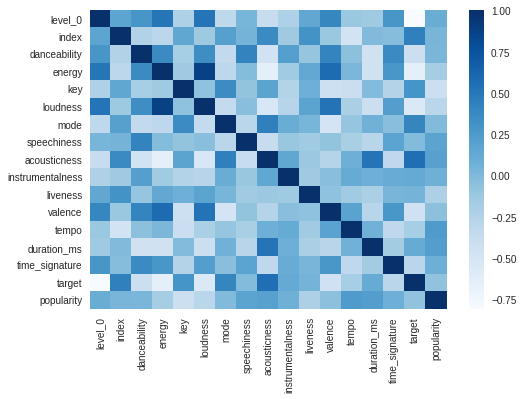

In [80]:
#feature correlation with popularity of song
corr = result.corr()
sns.heatmap(corr, cmap="Blues")
print("Correlation with danceability score:")
corr['top_popularity_correlations'] = np.abs(corr['popularity'])
corr2 = corr.sort_values('top_popularity_correlations', ascending = False)
pd.DataFrame(corr2['top_popularity_correlations'])

Text(0.5, 1.0, 'Popularity vs. Loudness')

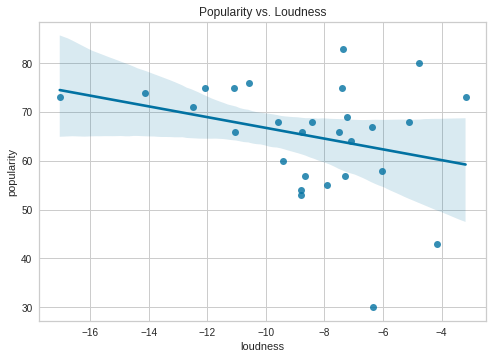

In [83]:
#loudness
sns.regplot(data=result, x="loudness", y="popularity").set_title('Popularity vs. Loudness')

In [84]:
result.isna().sum() #no missing data

level_0             0
index               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
target              0
genre               0
album               0
popularity          0
name                0
track_name          0
dtype: int64

In [85]:
#scale features 
#include popularity in addition to just sound features
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'popularity'] 

scaler = MinMaxScaler()
df_norm = scaler.fit_transform(result[features])
df_norm

array([[6.79316888e-01, 2.99962830e-01, 1.81818182e-01, 4.66729215e-01,
        1.00000000e+00, 5.51419906e-03, 9.38629236e-01, 0.00000000e+00,
        1.60997732e-01, 2.28048780e-01, 2.93716931e-01, 6.60464343e-01,
        1.00000000e+00, 8.67924528e-01],
       [8.51992410e-01, 2.67748730e-01, 9.09090909e-02, 2.09151270e-01,
        1.00000000e+00, 2.23325062e-02, 8.01890866e-01, 1.00000000e+00,
        1.50919627e-01, 1.08536585e-01, 5.43907995e-01, 6.42049197e-01,
        1.00000000e+00, 8.30188679e-01],
       [3.28273245e-01, 3.54478999e-01, 3.63636364e-01, 5.96997691e-01,
        0.00000000e+00, 0.00000000e+00, 6.38235494e-01, 1.24852071e-03,
        6.22071051e-01, 0.00000000e+00, 5.97075250e-01, 7.33191383e-01,
        0.00000000e+00, 6.79245283e-01],
       [9.98102467e-01, 8.86011647e-01, 4.54545455e-01, 9.28406467e-01,
        0.00000000e+00, 1.60187483e-01, 9.53733980e-02, 1.73964497e-01,
        1.68556311e-01, 9.39024390e-01, 3.23309818e-01, 2.77416508e-01,
        1.000

In [86]:
#indices & track name
indices = pd.Series(result.index, index=result['track_name']).drop_duplicates()
indices

track_name
Strawberries & Cigarettes                                 0
champagne problems                                        1
Astronomy                                                 2
Dust to Dust                                              3
Backyard Boy                                              4
Oh shit…are we in love?                                   5
Idea of Her                                               6
Emerald Eyes                                              7
Older                                                     8
this is how you fall in love                              9
perfume                                                  10
People Watching                                          11
Demons                                                   12
Vigilante Shit                                           13
Mariposa - Acoustic                                      14
Hey There Delilah                                        15
Until I Found You            

In [87]:
#find cosine similarity
cos_sim = cosine_similarity(df_norm)
cos_sim

array([[1.        , 0.89317489, 0.68950777, 0.6497658 , 0.85813696,
        0.89867221, 0.91035827, 0.757841  , 0.91185934, 0.93833955,
        0.91981822, 0.78540621, 0.86488437, 0.68658355, 0.79103955,
        0.71955067, 0.85721374, 0.95743803, 0.65613027, 0.91582898,
        0.79668703, 0.81425574, 0.95160114, 0.75252178, 0.79268919,
        0.86239424, 0.78076134, 0.89246686],
       [0.89317489, 1.        , 0.60578516, 0.59537786, 0.75325845,
        0.76769019, 0.81052367, 0.67249263, 0.79324111, 0.81574158,
        0.87398052, 0.69089424, 0.75937149, 0.63087763, 0.68276923,
        0.64806912, 0.78722998, 0.87177276, 0.58113462, 0.77790633,
        0.68404521, 0.72298561, 0.8426534 , 0.6842558 , 0.74265915,
        0.78466124, 0.65746597, 0.79727008],
       [0.68950777, 0.60578516, 1.        , 0.54797653, 0.56320439,
        0.67518777, 0.71144085, 0.50646615, 0.61637393, 0.59065677,
        0.60355369, 0.76053015, 0.65074025, 0.53358837, 0.71089133,
        0.62722809, 0.6251